# SPRINT 2.  FINANZAS

### ¿Los clientes con préstamos e hipotecas tienden a tener un saldo promedio más bajo o más riesgo de incumplimiento? ¿Cómo deberíamos ajustar nuestras ofertas y estrategias de gestión de riesgos en función de estos hallazgos?

## 1. IMPORTACIÓN BD Y CREACIÓN DEL DF

In [2]:
from sqlalchemy import create_engine, inspect
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, time, datetime
import pymysql

#Datos de conexión
usuario='EquipoB'
contraseña="E1q2u3i4p5oB"
host='212.227.90.6'
puerto=3306
nombre_base_datos='EquipB'

#URL de la conexión
url_conexion=f"mysql+pymysql://{usuario}:{contraseña}@{host}:{puerto}/{nombre_base_datos}"

#Crear l'engine de SQLAlchemy
try:
    engine=create_engine(url_conexion)
    cnx=engine.connect()
    print("Conexión correcta")
except Exception as e:
    print(f"Error al conectar con SQLAlchemy: {e}")
    
#Obtener el nombre de les tablas
inspector=inspect(engine)
nombre_tablas=inspector.get_table_names()

# Diccionario para almacenar los DataFrames
df= {}

for tabla in nombre_tablas:
    query=f"SELECT * FROM {tabla}"
    
    try:
        df[tabla] = pd.read_sql(query, cnx)
        print(f"Tabla '{tabla}' cargada correctamente.")
    except Exception as e:
        print(f"Error al cargar la tabla '{tabla}':{e}")
  
# Cerrrar la conexión
cnx.close()

Conexión correcta
Tabla 'BANK_marketing' cargada correctamente.
Tabla 'BANK_marketing131024' cargada correctamente.


Creamos el dataframe finanzas (a partir de la tabla con los registros actualizados) con el que trabajaremos a partir de ahora.

In [3]:
df_bank = df['BANK_marketing131024']

df_finanzas = df_bank[['id','age','job','marital','education','default','balance','housing','loan']]

Definimos el estilo que utilizaremos para nuestros gráficos.

In [4]:
#defino estilo para los gráficos 
plt.style.use("seaborn-v0_8-deep")

#colores de este estilo:
#4C72B0 – Azul
#55A868 – Verde
#C44E52 – Rojo
#8172B3 – Púrpura
#CCB974 – Amarillo mostaza
#64B5CD – Cian/Azul claro

## 2. EDA: ANÁLISIS EXPLORATÓRIO

Comprobamos los primeros registros del dataframe y la información clave de los campos.

In [5]:
df_finanzas.head()

,id,age,job,marital,education,default,balance,housing,loan
0,1,59,admin.,married,secondary,0,2343,1,0
1,2,59,admin.,married,secondary,0,2343,1,0
2,3,56,admin.,married,secondary,0,45,0,0
3,4,41,technician,married,secondary,0,1270,1,0
4,5,55,services,married,secondary,0,2476,1,0


In [6]:
df_finanzas.describe()

,id,age,default,balance,housing,loan
count,16163.000000,16163.000000,16163.000000,16163.000000,16163.000000,16163.000000
mean,9696.799233,41.262699,0.014911,1527.209924,0.472932,0.132772
std,6754.310906,11.961480,0.121199,3242.089071,0.499282,0.339339
min,1.000000,18.000000,0.000000,-6847.000000,0.000000,0.000000
25%,4041.500000,32.000000,0.000000,123.000000,0.000000,0.000000
50%,8082.000000,39.000000,0.000000,543.000000,0.000000,0.000000
75%,17342.500000,49.000000,0.000000,1717.000000,1.000000,0.000000
max,21383.000000,95.000000,1.000000,81204.000000,1.000000,1.000000


Nos aseguramos que no hay valores nulos en el dataframe.

In [7]:
df_finanzas.isnull().sum()

id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
dtype: int64

In [8]:
df_finanzas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16163 entries, 0 to 16162
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         16163 non-null  int64 
 1   age        16163 non-null  int64 
 2   job        16163 non-null  object
 3   marital    16163 non-null  object
 4   education  16163 non-null  object
 5   default    16163 non-null  int64 
 6   balance    16163 non-null  int64 
 7   housing    16163 non-null  int64 
 8   loan       16163 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 1.1+ MB


### 2.1 VISUALIZACIONES DE CADA VARIABLE POR SEPARADO

#### BALANCE/SALDO

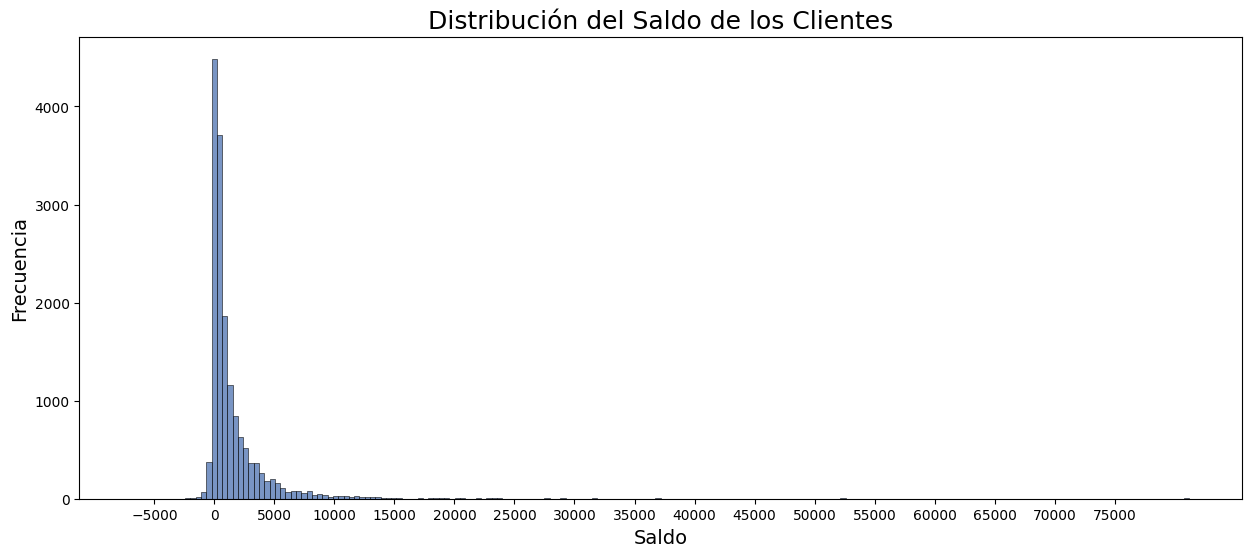

In [9]:
plt.figure(figsize=(15, 6))

sns.histplot(data=df_finanzas, x='balance', bins=200)

plt.title('Distribución del Saldo de los Clientes',fontsize=18)
plt.xlabel('Saldo', fontsize = 14)
plt.ylabel('Frecuencia', fontsize = 14)
plt.xticks(range(-5000,80000,5000), fontsize= 10)
plt.show()

Recordamos que la variable balance presenta una distribución asimétrica, en la que gran parte de registros se encuentran entre 0 y 1000, con una cola a la derecha que refleja a los saldos superiores. 

#### INCUMPLIMIENTO DE CRÉDITO

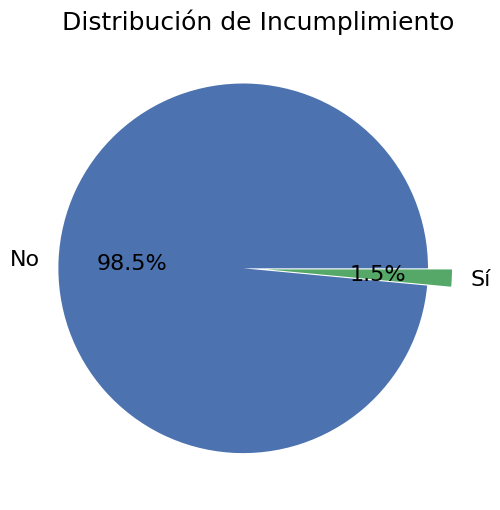

In [10]:
compteig_faltante= df_finanzas['default'].value_counts()
plt.figure(figsize=(6,6))
explode = (0.08, 0.05)
plt.pie(compteig_faltante,
        labels=["No", "Sí"], 
        autopct='%1.1f%%', 
        explode= explode,
        textprops={'fontsize': 16} )
plt.title("Distribución de Incumplimiento", fontsize=18 )
plt.show()

Recordamos que tan solo el 1.5% de los clientes se encuentran en estado de incumplimiento de crédito. Aún así, esto puede suponer un riesgo importante para el banco.

#### PRÉSTAMO

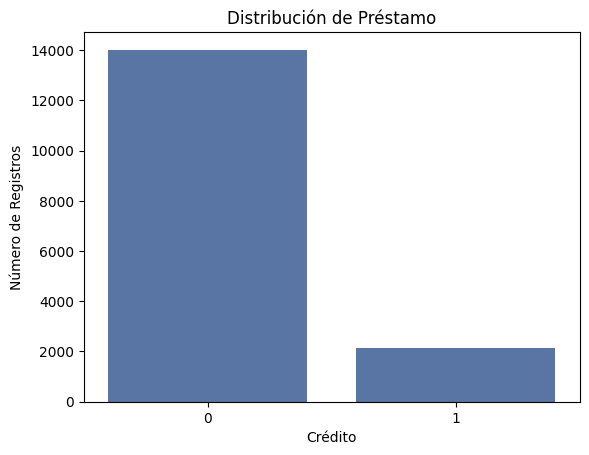

In [11]:
sns.countplot(x='loan', data= df_finanzas)
plt.title('Distribución de Préstamo')
plt.xlabel('Crédito')
plt.ylabel('Número de Registros')
plt.show()

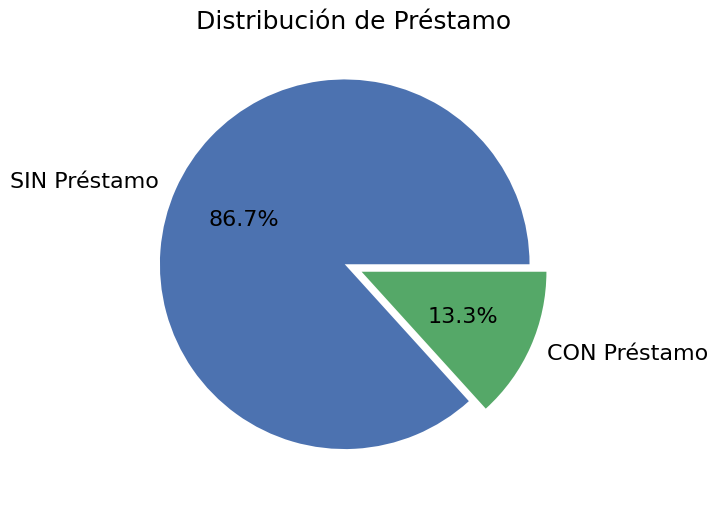

In [13]:
compteig_faltante= df_finanzas['loan'].value_counts()
plt.figure(figsize=(6,6))
explode = (0.05, 0.05)
plt.pie(compteig_faltante,
        labels=["SIN Préstamo", "CON Préstamo" ],
        autopct='%1.1f%%', 
        explode= explode,
        textprops={'fontsize': 16} )
plt.title("Distribución de Préstamo", fontsize=18 )
plt.show()

Observamos una distribución asimétrica en los clientes: el 13.3% del total tienen algún préstamo personal. 

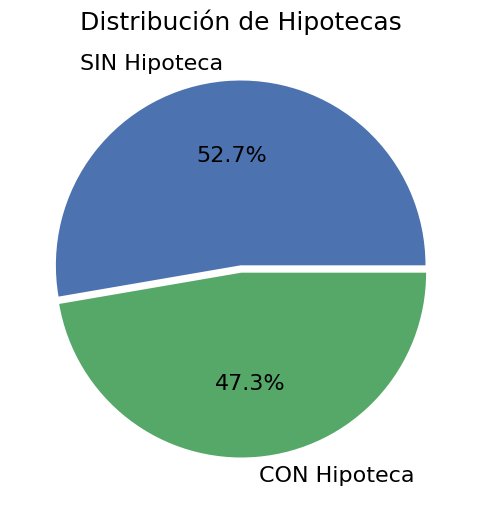

In [14]:
compteig_faltante= df_finanzas['housing'].value_counts()
plt.figure(figsize=(6,6))
explode = (0.02, 0.02)
plt.pie(compteig_faltante,
        labels=["SIN Hipoteca", "CON Hipoteca"], 
        autopct='%1.1f%%', 
        explode= explode, 
        textprops={'fontsize': 16})
plt.title("Distribución de Hipotecas", fontsize=18 )
plt.show()

En este caso vemos que la distribución es más simétrica, el 47.3% de los clientes tienen una hipoteca.

### 2.2 VISUALIZACIONES DE LA COMPARACIÓN ENTRE VARIABLES

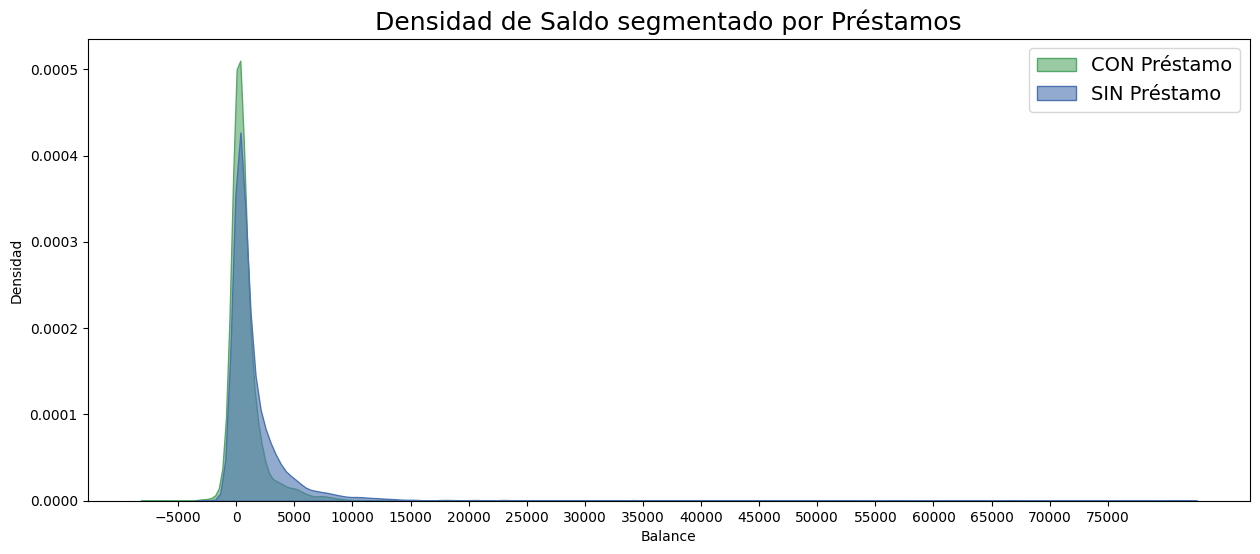

In [18]:
plt.figure(figsize=(15, 6))

sns.kdeplot(data=df_finanzas, x='balance', hue='loan', fill=True, common_norm=False, alpha=0.6)

plt.title('Densidad de Saldo segmentado por Préstamos',fontsize=18)
plt.xlabel('Balance')
plt.ylabel('Densidad')
plt.legend (labels=["CON Préstamo", "SIN Préstamo"],fontsize=14)


plt.xticks(range(-5000,80000,5000), fontsize = 10)

plt.show()

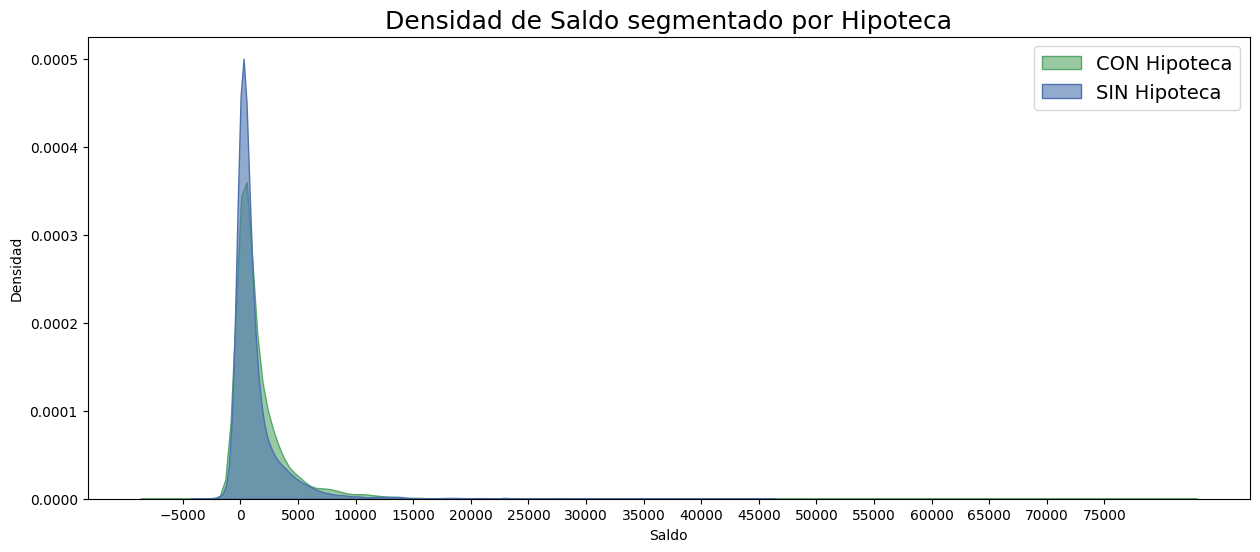

In [16]:
plt.figure(figsize=(15, 6))

sns.kdeplot(data=df_finanzas, x='balance', hue='housing', hue_order=[1, 0], fill=True, common_norm=False, alpha=0.6)

plt.title('Densidad de Saldo segmentado por Hipoteca', fontsize=18)
plt.legend( labels=['CON Hipoteca','SIN Hipoteca'],fontsize=14)
plt.xlabel('Saldo')
plt.ylabel('Densidad')

plt.xticks(range(-5000,80000,5000), fontsize = 10)

plt.show()

En ambos casos observamos que no hay gran variación en la distribución del saldo de los clientes, sobretodo en cuanto a los saldos inferiores a 5000. 

## 3. ANÁLISIS DE LAS CUATRO VARIABLES

Para analizar la tendencia del balance y el incumplimiento de los clientes que tienen préstamo o hipoteca, decidimos categorizar a los clientes según si tienen dicho producto financiero. 

Definimos 4 categorías: 
* **Con Préstamo, Con Hipoteca**: Sí hipoteca (Housing), Sí préstamo (Loan)
* **Con Hipoteca**: Sí hipoteca, No préstamo
* **Con Préstamo**: No hipoteca, Sí préstamo
* **Sin Préstamo, Sin Hipoteca**: No hipoteca, No préstamo

In [19]:
def clasificacion_clientes (housing, loan):
    if housing == 1 and loan == 1:
        return "CON Préstamo, CON Hipoteca"
    elif housing == 1 and loan == 0:
        return "CON Hipoteca"
    elif housing == 0 and loan == 1:
        return "CON Préstamo"
    elif housing == 0 and loan == 0:
        return "SIN Préstamo, SIN Hipoteca"
    else:
        return "No categorizado" # no deberíamos tener clientes en esta categoria
    
    
# para clasificar a los clientes segun los dos parametros utilizados en la funcion: 
# df['col_3'] = df.apply(lambda x: f(x.col_1, x.col_2), axis=1)

df_finanzas["categoria_cliente"] = df_finanzas.apply(lambda x: clasificacion_clientes(x.housing, x.loan), axis=1)

# ordenamos las categorias para que aparezcan siempre en el mismo orden en los siguientes gráficos
orden_categorias = ['SIN Préstamo, SIN Hipoteca', 'CON Préstamo', 'CON Hipoteca', 'CON Préstamo, CON Hipoteca']

df_finanzas["categoria_cliente"] = pd.Categorical(df_finanzas["categoria_cliente"],
                                                  categories=orden_categorias,
                                                  ordered=True)

C:\Users\Natalya\AppData\Local\Temp\ipykernel_8804\3170260058.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_finanzas["categoria_cliente"] = df_finanzas.apply(lambda x: clasificacion_clientes(x.housing, x.loan), axis=1)
C:\Users\Natalya\AppData\Local\Temp\ipykernel_8804\3170260058.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_finanzas["categoria_cliente"] = pd.Categorical(df_finanzas["categoria_cliente"],


In [20]:
df_finanzas.head()

,id,age,job,marital,education,default,balance,housing,loan,categoria_cliente
0,1,59,admin.,married,secondary,0,2343,1,0,CON Hipoteca
1,2,59,admin.,married,secondary,0,2343,1,0,CON Hipoteca
2,3,56,admin.,married,secondary,0,45,0,0,"SIN Préstamo, SIN Hipoteca"
3,4,41,technician,married,secondary,0,1270,1,0,CON Hipoteca
4,5,55,services,married,secondary,0,2476,1,0,CON Hipoteca


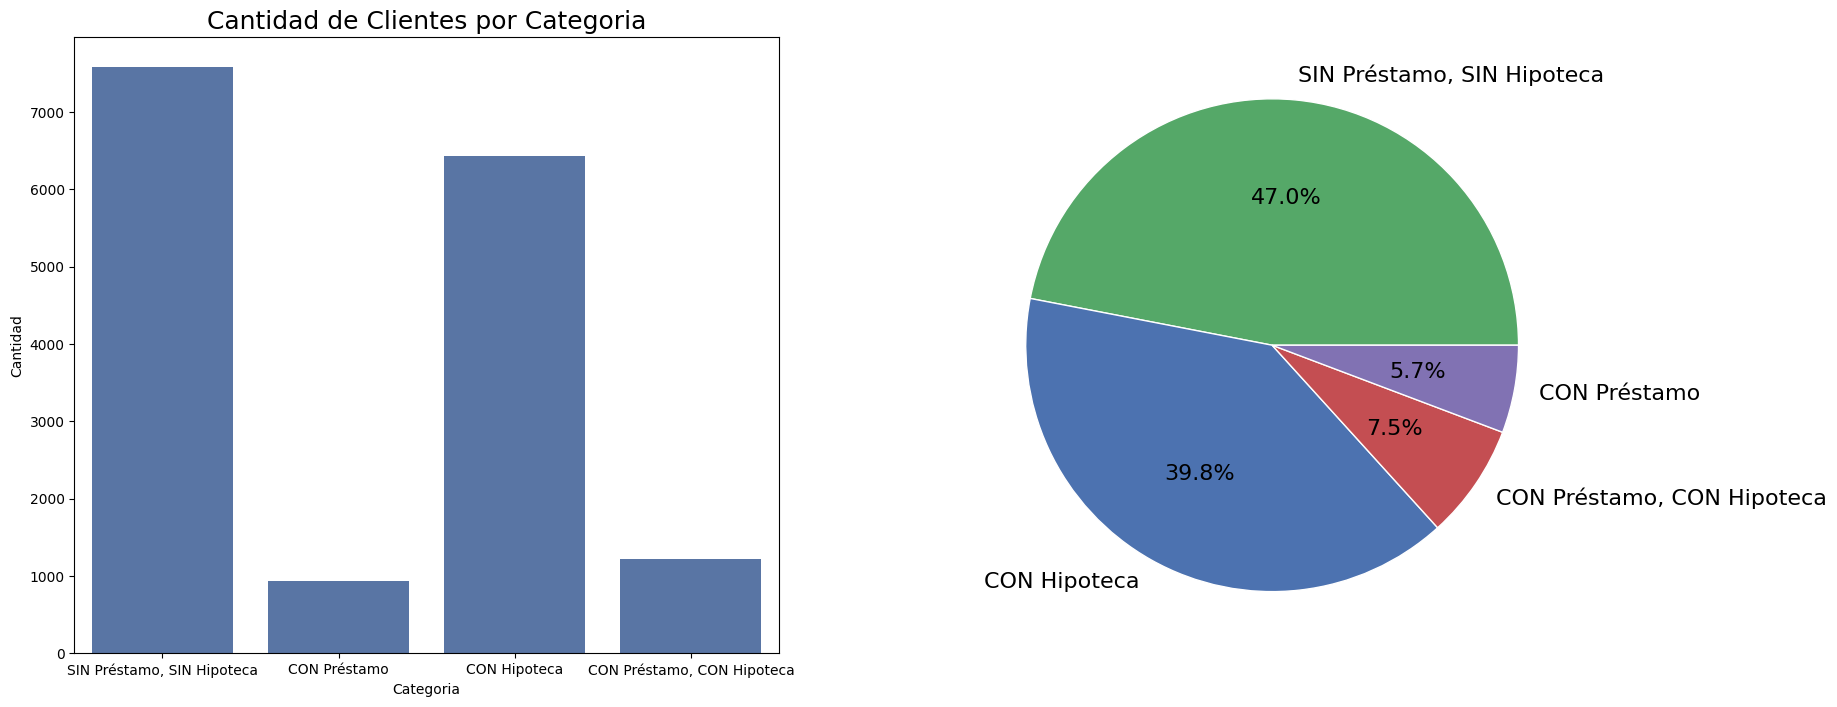

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

sns.countplot(data=df_finanzas,
              x="categoria_cliente",
              ax=ax1)

ax1.set_title('Cantidad de Clientes por Categoria', fontsize=18)
ax1.set_xlabel('Categoria')
ax1.set_ylabel('Cantidad')

categoria_count = df_finanzas['categoria_cliente'].value_counts() 

colores2 = ["#55A868", "#4C72B0", "#C44E52", "#8172B3"]


ax2.pie(categoria_count,  
        autopct='%1.1f%%', 
        wedgeprops={'edgecolor': 'white'},
        labels=categoria_count.index,
        colors=colores2,
        textprops={'fontsize': 16})

# ax2.set_title('Distribución de Clientes por Categoría')
# ax2.legend(categoria_count.index)

plt.show()

Observamos que la mayoría de los clientes no tienen ni préstamo personal ni hipoteca (47%), seguidos de aquellos que tienen unicamente hipoteca (39.8%) y con menor proporción los que tienen préstamo o ambos. 

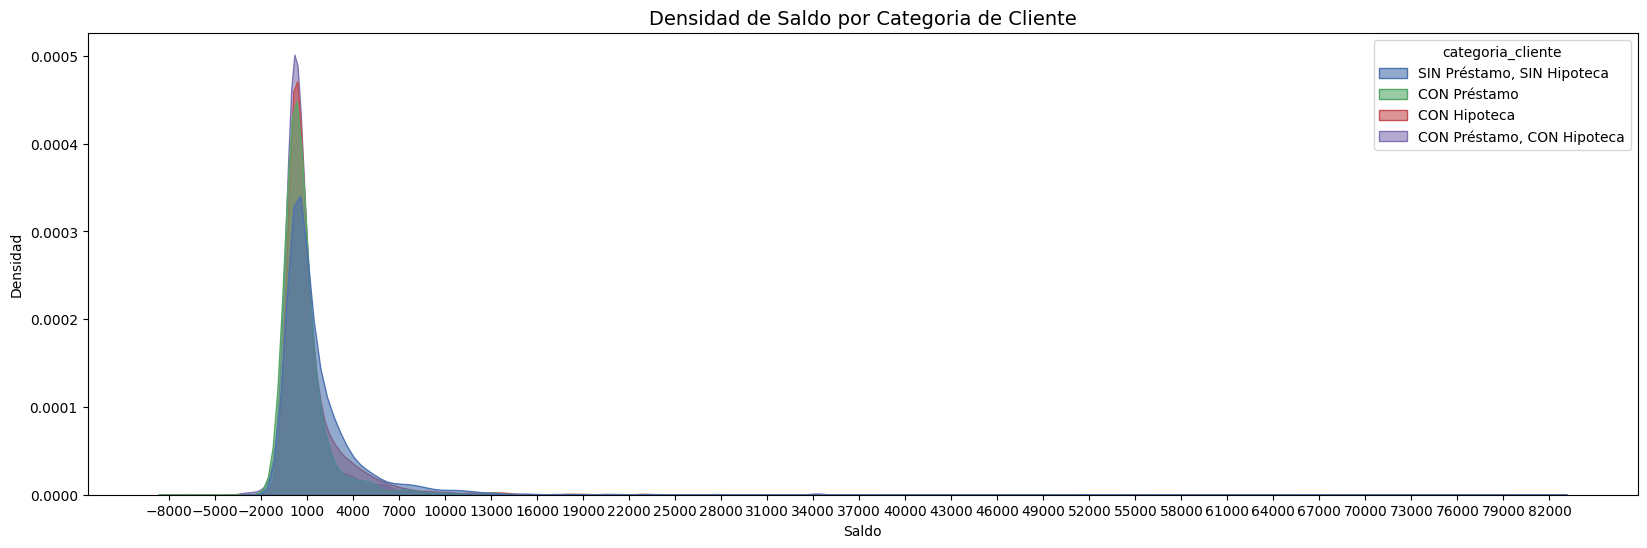

In [22]:
plt.figure(figsize=(20, 6))

sns.kdeplot(data=df_finanzas, x='balance', hue='categoria_cliente', fill=True, common_norm=False, alpha=0.6)

plt.title('Densidad de Saldo por Categoria de Cliente', fontsize=14)
plt.xlabel('Saldo')
plt.ylabel('Densidad')

plt.xticks(range(-8000,85000,3000))

plt.show()

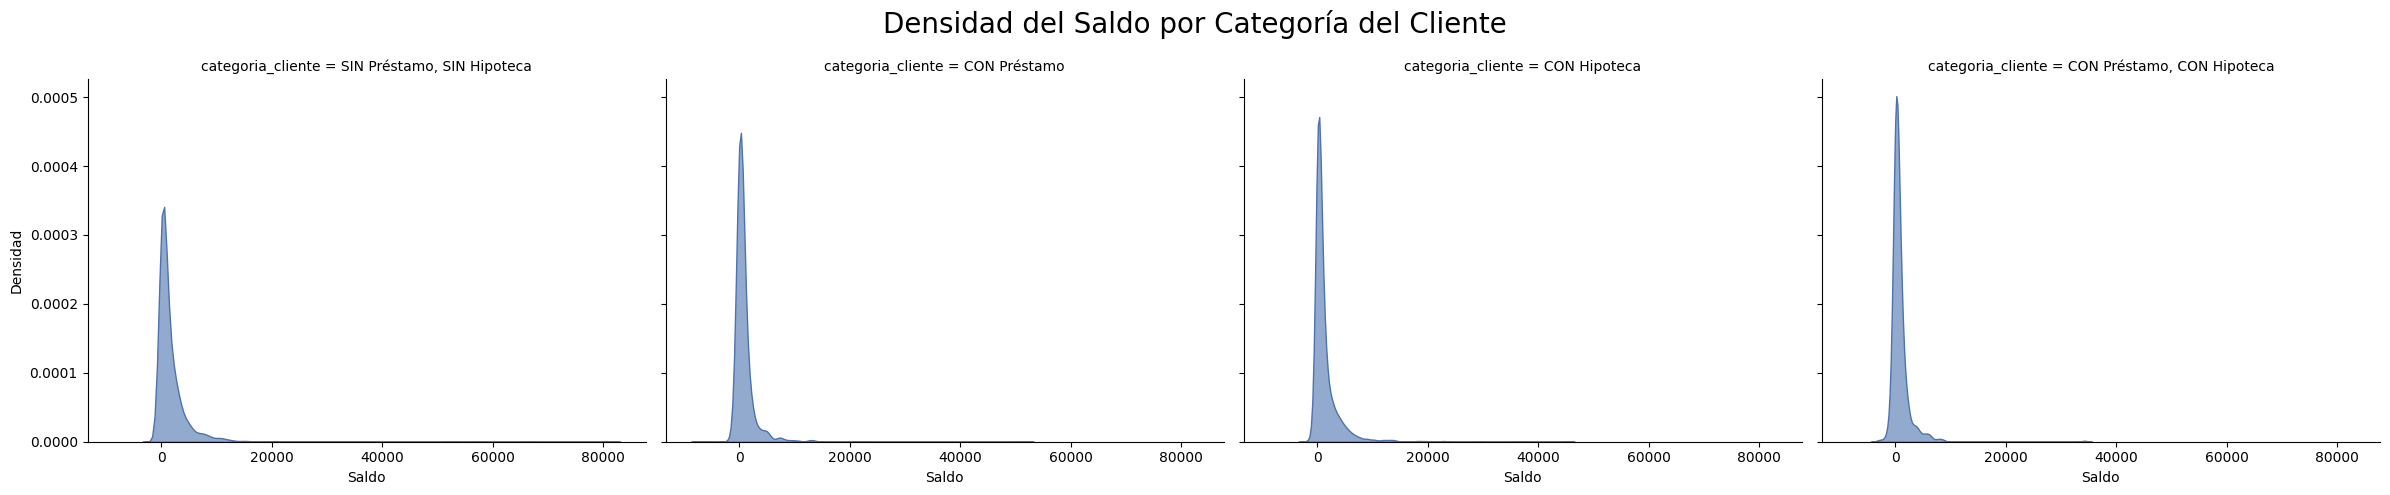

In [23]:
g = sns.FacetGrid(df_finanzas, col='categoria_cliente', col_wrap=4, height=5, aspect=1.2)

g.map(sns.kdeplot, 'balance', fill=True, common_norm=False, alpha=0.6)

g.figure.suptitle('Densidad del Saldo por Categoría del Cliente', fontsize=20)
g.set_axis_labels(x_var='Saldo', y_var='Densidad')
plt.tight_layout()
             
plt.show()

A simple vista no se observan grandes diferencias en la distribución del saldo en las 4 categorías; los clientes sin prestamo y sin hipoteca alcanzan valores de saldo superiores que el resto. 

### TENDENCIA DEL SALDO PROMEDIO POR CATEGORIA

C:\Users\Natalya\AppData\Local\Temp\ipykernel_8804\688918621.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  saldo_categoria = df_finanzas.groupby("categoria_cliente")['balance'].mean().reset_index(name="saldo_promedio")


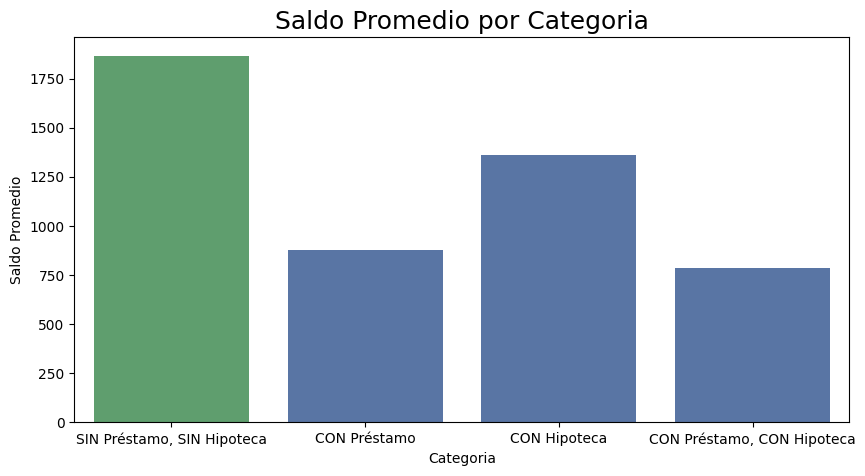

In [24]:
saldo_categoria = df_finanzas.groupby("categoria_cliente")['balance'].mean().reset_index(name="saldo_promedio")
colores = ["#55A868","#4C72B0","#4C72B0","#4C72B0"]

plt.figure(figsize=(10,5))

sns.barplot(data=saldo_categoria,
              x="categoria_cliente",
              hue="categoria_cliente",
              legend=False,
              palette=colores,
              y="saldo_promedio")

plt.title('Saldo Promedio por Categoria', fontsize=18)
plt.xlabel('Categoria')
plt.ylabel('Saldo Promedio')

plt.show()

Tabla resumen del saldo promedio, mínimo y máximo para cada categoria de cliente

In [25]:
df_finanzas.groupby("categoria_cliente")[['balance']].agg(['count','mean','min','max','median']).reset_index()

C:\Users\Natalya\AppData\Local\Temp\ipykernel_8804\456170699.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_finanzas.groupby("categoria_cliente")[['balance']].agg(['count','mean','min','max','median']).reset_index()


categoria_cliente balance                                 
                                count         mean   min    max median
0  SIN Préstamo, SIN Hipoteca    7590  1868.089987 -1415  81204  695.0
1                CON Préstamo     929   877.978471 -6847  51439  280.0
2                CON Hipoteca    6427  1359.357554 -2049  45248  495.0
3  CON Préstamo, CON Hipoteca    1217   783.285127 -3058  34230  304.0

Hay una tendencia clara de que los clientes que tienen contratado un préstamo personal y/o una hipoteca presentan un saldo medio más bajo que aquellos que estan libres de cargas financieras. Esto queda reflejado en el promedio y en la mediana del saldo de cada categoría.

### TENDENCIA DE INCUMPLIMIENTO POR CATEGORIA

Primero de todo, calculamos el porcentaje de incumplimiento de cada grupo.

In [26]:
incumplimiento_categoria = pd.merge(df_finanzas.query("default == 1").groupby(by="categoria_cliente").size().reset_index(name="default_si"),
                                    df_finanzas.query("default == 0").groupby(by="categoria_cliente").size().reset_index(name="default_no"),
                                    on="categoria_cliente")

incumplimiento_categoria['total'] = incumplimiento_categoria['default_no'] + incumplimiento_categoria['default_si']
incumplimiento_categoria["% incumplimiento"] = (incumplimiento_categoria['default_si'] / incumplimiento_categoria['total']) * 100

incumplimiento_categoria

C:\Users\Natalya\AppData\Local\Temp\ipykernel_8804\657191133.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  incumplimiento_categoria = pd.merge(df_finanzas.query("default == 1").groupby(by="categoria_cliente").size().reset_index(name="default_si"),
C:\Users\Natalya\AppData\Local\Temp\ipykernel_8804\657191133.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_finanzas.query("default == 0").groupby(by="categoria_cliente").size().reset_index(name="default_no"),


,categoria_cliente,default_si,default_no,total,% incumplimiento
0,"SIN Préstamo, SIN Hipoteca",70,7520,7590,0.922266
1,CON Préstamo,49,880,929,5.274489
2,CON Hipoteca,88,6339,6427,1.369224
3,"CON Préstamo, CON Hipoteca",34,1183,1217,2.793755


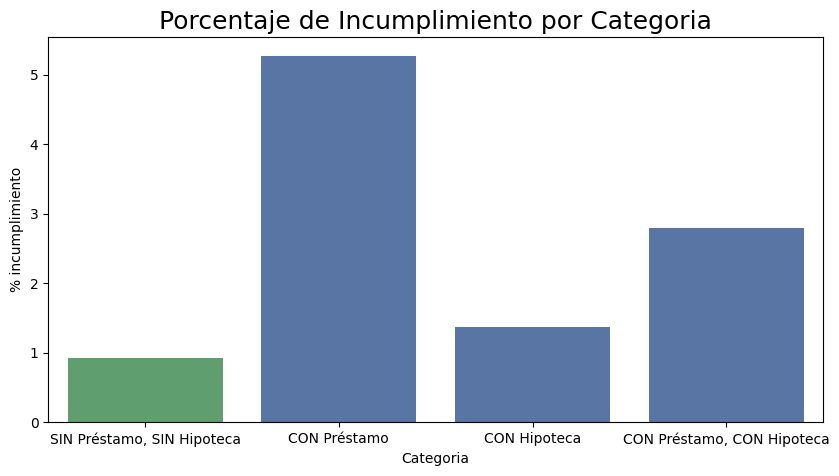

In [27]:
plt.figure(figsize=(10,5))

sns.barplot(data=incumplimiento_categoria,
              x="categoria_cliente",
              y="% incumplimiento",
              hue="categoria_cliente",
              legend=False,
              palette=colores)

plt.title('Porcentaje de Incumplimiento por Categoria', fontsize=18)
plt.xlabel('Categoria')
plt.ylabel('% incumplimiento')

plt.show()

Se observa que, efectivamente, los clientes que tienen contratado un préstamo personal y/o hipoteca presentan mayor porcentaje de incumplimiento y, por tanto, estan en mayor riesgo de incumplir con sus obligaciones financieras con el banco. Sobretodo destacan los clientes con préstamo, con el mayor porcentaje de incumplimiento (superando el 5%).

### HEATMAP DE INTENSIDAD DE LOS RESULTADOS POR CATEGORIA

In [28]:
heatmap_categoria = pd.merge(saldo_categoria,
                            incumplimiento_categoria,
                            on="categoria_cliente")

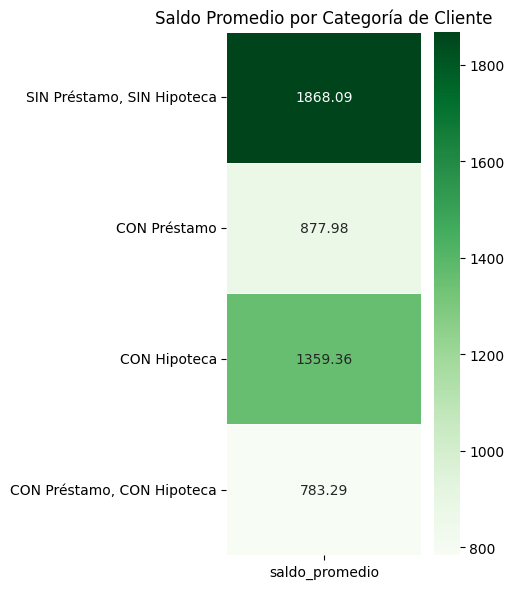

In [29]:
plt.figure(figsize=(5,6))

sns.heatmap(heatmap_categoria[['saldo_promedio']].set_index(heatmap_categoria['categoria_cliente']),
            annot=True, cmap="Greens", fmt=".2f", linewidths=.5)

plt.title('Saldo Promedio por Categoría de Cliente')
plt.ylabel('')

plt.tight_layout()
plt.show()

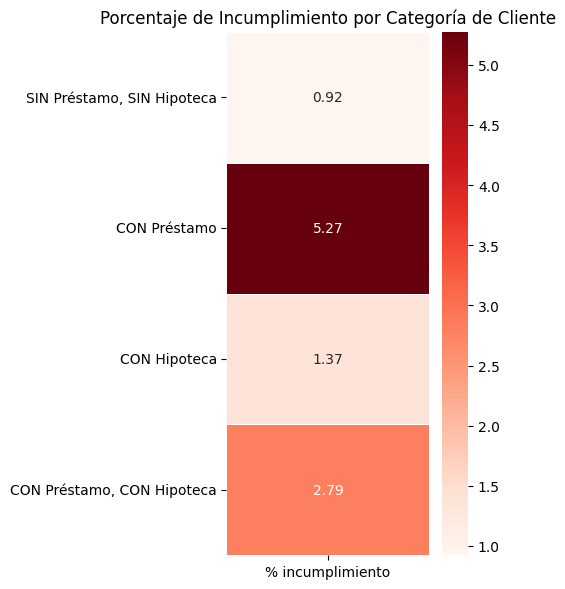

In [30]:
plt.figure(figsize=(5,6))

sns.heatmap(heatmap_categoria[['% incumplimiento']].set_index(heatmap_categoria['categoria_cliente']),
            annot=True, cmap="Reds", fmt=".2f", linewidths=.5)

plt.title('Porcentaje de Incumplimiento por Categoría de Cliente')
plt.ylabel('')

plt.tight_layout()
plt.show()

Otra manera de representar visualmente los resultados comentados en los apartados anteriores.

### CUANTIFICACION DE LAS RELACIONES

Para finalizar con nuestro análisis, calculamos el porcentaje de variación de cada categoría respecto el grupo control (clientes sin prestamo ni hipoteca).

In [32]:
SinPrestamo_SinHipoteca = 1868.09 # Valor de control
ConHipoteca = 1359.35
ConPrestamo = 877.98
ConPrestamo_ConHipoteca = 783.29
# Calculo de la variación en %
Variación_ConHipoteca = (( ConHipoteca - SinPrestamo_SinHipoteca ) / SinPrestamo_SinHipoteca) * 100
Variación_ConPrestamo = (( ConPrestamo - SinPrestamo_SinHipoteca ) / SinPrestamo_SinHipoteca) * 100
Variación_ConPrestamo_ConHipoteca = (( ConPrestamo_ConHipoteca - SinPrestamo_SinHipoteca ) / SinPrestamo_SinHipoteca) * 100

Variación_ConHipoteca,Variación_ConPrestamo,Variación_ConPrestamo_ConHipoteca

(-27.2331632844242, -53.00119373263601, -58.07000733369377)

In [33]:
SinPrestamo_SinHipoteca = 0.92 # Valor de control
ConHipoteca = 1.37
ConPrestamo = 5.27
ConPrestamo_ConHipoteca = 2.79
# Calculo de la variación en %
Variación_ConHipoteca = (( ConHipoteca - SinPrestamo_SinHipoteca ) / SinPrestamo_SinHipoteca) * 100
Variación_ConPrestamo = (( ConPrestamo - SinPrestamo_SinHipoteca ) / SinPrestamo_SinHipoteca) * 100
Variación_ConPrestamo_ConHipoteca = (( ConPrestamo_ConHipoteca - SinPrestamo_SinHipoteca ) / SinPrestamo_SinHipoteca) * 100

Variación_ConHipoteca,Variación_ConPrestamo,Variación_ConPrestamo_ConHipoteca

(48.913043478260875, 472.8260869565217, 203.26086956521738)